# 1.Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Unzip the folder

In [ ]:
# Step 2: Define the path to your zip file
zip_file_path = '/content/drive/MyDrive/FETAL_PLANES_ZENODO (1).zip'
# Step 3: Unzip the file
import zipfile
import os

# Define the directory where you want to unzip the file
unzip_dir = '/content/unzipped_files'
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f'Files have been unzipped into the directory: {unzip_dir}')

Files have been unzipped into the directory: /content/unzipped_files


# 3.Load the images file

In [ ]:
# prompt: load the images and count

import os
from PIL import Image

# Define the directory containing the images
image_dir = '/content/unzipped_files/Images'

# Initialize a counter for the images
image_count = 0

# Iterate through the files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        try:
            # Attempt to open the image file
            img = Image.open(os.path.join(image_dir, filename))
            image_count += 1
        except Exception as e:
            print(f"Error loading image {filename}: {e}")

print(f"Total number of images: {image_count}")


Total number of images: 12400


# 4.Load the csv file

In [ ]:
# prompt: load the csv file

import pandas as pd

# Define the path to your CSV file
csv_file_path = '/content/unzipped_files/FETAL_PLANES_DB_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


  Image_name;Patient_num;Plane;Brain_plane;Operator;US_Machine;Train 
0  Patient00001_Plane1_1_of_15;1;Other;Not A Brai...                 
1  Patient00001_Plane1_2_of_15;1;Other;Not A Brai...                 
2  Patient00001_Plane1_3_of_15;1;Other;Not A Brai...                 
3  Patient00001_Plane1_4_of_15;1;Other;Not A Brai...                 
4  Patient00001_Plane1_5_of_15;1;Other;Not A Brai...                 


# 5.Split the columns

In [ ]:
import pandas as pd

# Define the path to your CSV file
csv_file_path = '/content/unzipped_files/FETAL_PLANES_DB_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, delimiter=';')  # Use ';' as the delimiter if your CSV is semicolon-separated

# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

# Split the Image_name column
# This assumes the format of Image_name is 'Patient00001_Plane1_1_of_15' and needs to be split into multiple parts
df[['Patient_ID', 'Plane_ID', 'Image_No', 'Part', 'Total']] = df['Image_name'].str.split('_', expand=True)

# Display the DataFrame to check the split result
print("\nDataFrame with Split Image_name:")
print(df.head())

# If the other columns (Patient_num, Plane, Brain_plane, Operator, US_Machine, Train) need splitting,
# you would need to specify the exact splitting logic based on their format. For simplicity,
# we'll assume they don't need splitting in this case.

# Display the final DataFrame
print("\nFinal DataFrame:")
print(df)


Original DataFrame:
                    Image_name  Patient_num  Plane  Brain_plane Operator  \
0  Patient00001_Plane1_1_of_15            1  Other  Not A Brain    Other   
1  Patient00001_Plane1_2_of_15            1  Other  Not A Brain    Other   
2  Patient00001_Plane1_3_of_15            1  Other  Not A Brain    Other   
3  Patient00001_Plane1_4_of_15            1  Other  Not A Brain    Other   
4  Patient00001_Plane1_5_of_15            1  Other  Not A Brain    Other   

  US_Machine  Train   
0      Aloka       1  
1      Aloka       1  
2      Aloka       1  
3      Aloka       1  
4      Aloka       1  

DataFrame with Split Image_name:
                    Image_name  Patient_num  Plane  Brain_plane Operator  \
0  Patient00001_Plane1_1_of_15            1  Other  Not A Brain    Other   
1  Patient00001_Plane1_2_of_15            1  Other  Not A Brain    Other   
2  Patient00001_Plane1_3_of_15            1  Other  Not A Brain    Other   
3  Patient00001_Plane1_4_of_15            1  Ot

# 6.Sort the images based on plane type

In [ ]:
import pandas as pd
import os
import shutil

# Define paths
csv_file_path = '/content/unzipped_files/FETAL_PLANES_DB_data.csv'
images_dir = '/content/unzipped_files/Images'
output_dir = '/content/unzipped_files/Sorted_Planes'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows to understand the structure
print("CSV DataFrame:")
print(df.head())

# Create directories for each plane type
planes = df['Plane'].unique()
for plane in planes:
    plane_dir = os.path.join(output_dir, plane)
    os.makedirs(plane_dir, exist_ok=True)

# Move images to corresponding plane directories
for index, row in df.iterrows():
    image_name = row['Image_name']
    plane_type = row['Plane']

    # Check and handle if file extension is missing
    if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        # Attempt to infer the extension or handle as needed
        image_name += '.png'  # Example: Assuming PNG if no extension found

    # Define source and destination paths
    src_path = os.path.join(images_dir, image_name)
    dst_path = os.path.join(output_dir, plane_type, image_name)

    # Print paths for debugging
    print(f"Source path: {src_path}")
    print(f"Destination path: {dst_path}")

    # Move the image file to the corresponding directory
    if os.path.isfile(src_path):
        shutil.move(src_path, dst_path)
    else:
        print(f"Image file not found: {src_path}")

print("\nImage sorting completed.")


Streaming output truncated to the last 5000 lines.
Source path: /content/unzipped_files/Images/Patient01486_Plane1_23_of_26.png
Destination path: /content/unzipped_files/Sorted_Planes/Other/Patient01486_Plane1_23_of_26.png
Source path: /content/unzipped_files/Images/Patient01486_Plane1_24_of_26.png
Destination path: /content/unzipped_files/Sorted_Planes/Other/Patient01486_Plane1_24_of_26.png
Source path: /content/unzipped_files/Images/Patient01486_Plane1_25_of_26.png
Destination path: /content/unzipped_files/Sorted_Planes/Other/Patient01486_Plane1_25_of_26.png
Source path: /content/unzipped_files/Images/Patient01486_Plane1_26_of_26.png
Destination path: /content/unzipped_files/Sorted_Planes/Other/Patient01486_Plane1_26_of_26.png
Source path: /content/unzipped_files/Images/Patient01487_Plane2_1_of_1.png
Destination path: /content/unzipped_files/Sorted_Planes/Fetal abdomen/Patient01487_Plane2_1_of_1.png
Source path: /content/unzipped_files/Images/Patient01487_Plane3_1_of_2.png
Destinatio

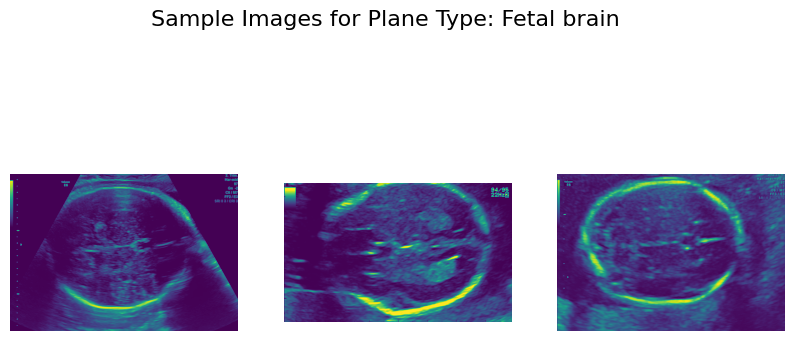

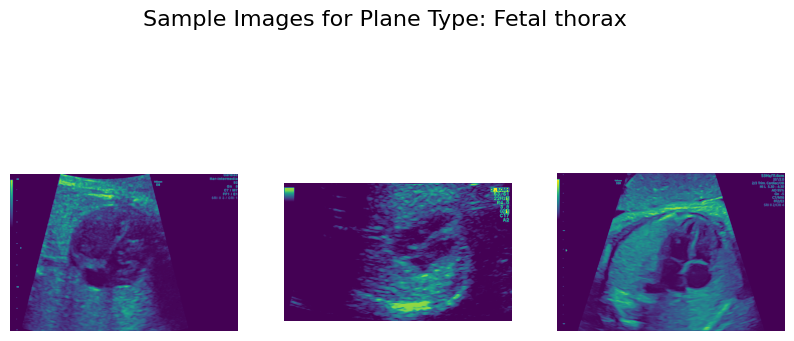

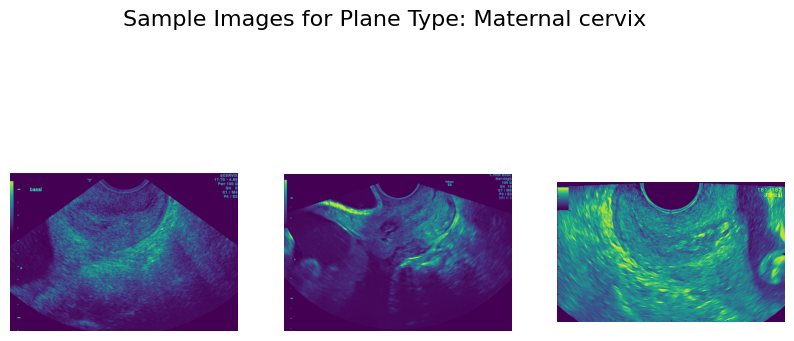

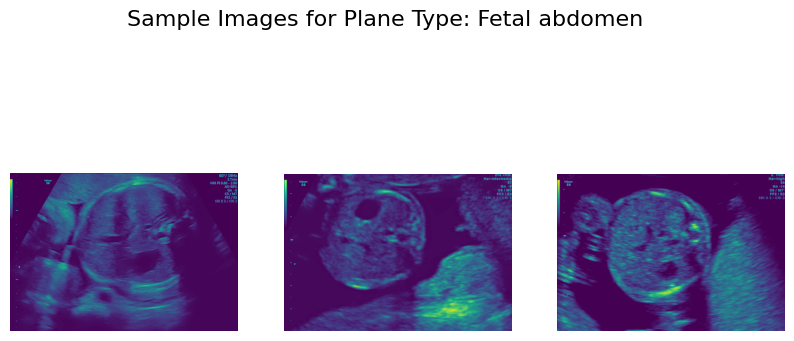

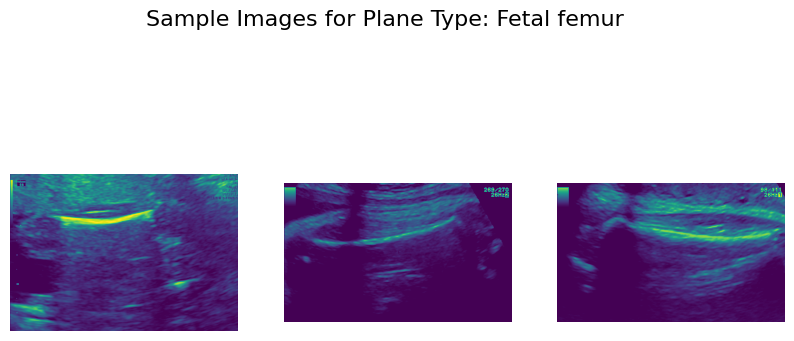

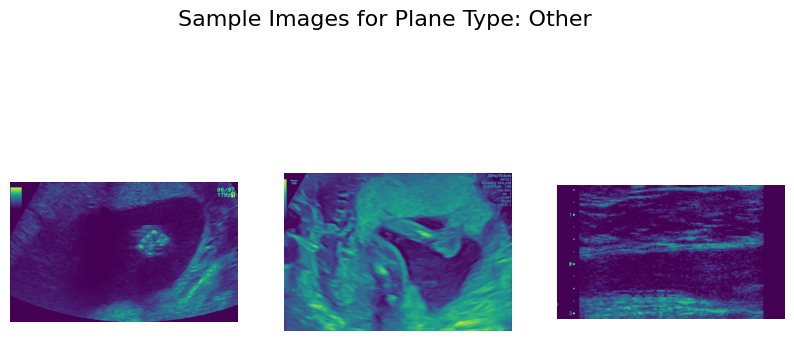

In [ ]:
# prompt: display sample images with each plane name

import matplotlib.pyplot as plt
import os

# Define the directory containing the sorted images
sorted_images_dir = '/content/unzipped_files/Sorted_Planes'

# Get the list of plane types
plane_types = os.listdir(sorted_images_dir)

# Display sample images for each plane type
for plane_type in plane_types:
    plane_dir = os.path.join(sorted_images_dir, plane_type)
    image_files = os.listdir(plane_dir)

    # Select a few sample images (e.g., first 3)
    sample_images = image_files[:3]

    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Sample Images for Plane Type: {plane_type}", fontsize=16)

    for i, image_file in enumerate(sample_images):
        image_path = os.path.join(plane_dir, image_file)
        try:
            img = Image.open(image_path)
            plt.subplot(1, len(sample_images), i + 1)
            plt.imshow(img)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

    plt.show()


# 7.Resize the images

In [ ]:
import cv2
import os

# Define paths
sorted_images_dir = '/content/unzipped_files/Sorted_Planes'
resized_images_dir = '/content/unzipped_files/Resized_Planes'

# Target size
target_size = (224, 224)  # (width, height)

# Create the resized images directory if it doesn't exist
os.makedirs(resized_images_dir, exist_ok=True)

# Resize images and save to the resized directory
for plane_type in os.listdir(sorted_images_dir):
    plane_dir = os.path.join(sorted_images_dir, plane_type)
    resized_plane_dir = os.path.join(resized_images_dir, plane_type)

    # Create directory for each plane type in resized folder
    os.makedirs(resized_plane_dir, exist_ok=True)

    if os.path.isdir(plane_dir):
        for image_name in os.listdir(plane_dir):
            src_path = os.path.join(plane_dir, image_name)
            dst_path = os.path.join(resized_plane_dir, image_name)

            # Read the image
            img = cv2.imread(src_path)

            if img is not None:
                # Resize the image
                img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

                # Save the resized image
                cv2.imwrite(dst_path, img_resized)
                print(f"Resized and saved: {dst_path}")
            else:
                print(f"Failed to read image: {src_path}")

print("\nResizing completed.")


Streaming output truncated to the last 5000 lines.
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01202_Plane5_1_of_2.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01439_Plane5_1_of_1.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01691_Plane5_1_of_1.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01636_Plane5_1_of_1.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01657_Plane5_1_of_1.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01157_Plane5_1_of_1.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01648_Plane5_5_of_5.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01088_Plane5_2_of_2.png
Resized and saved: /content/unzipped_files/Resized_Planes/Fetal femur/Patient01133_Plane5_1_of_1.png
Resized and saved: /content/unzipped_fil

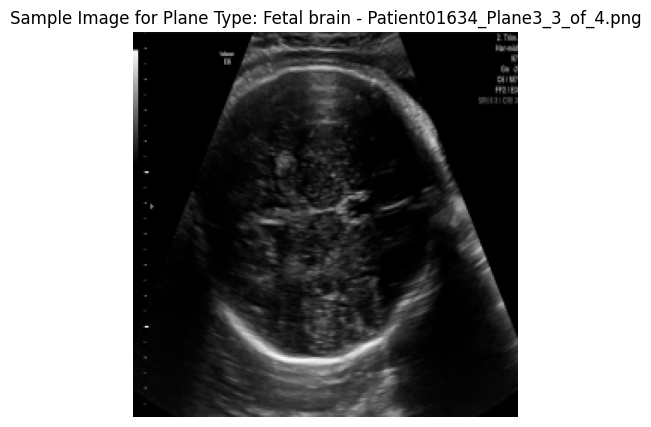

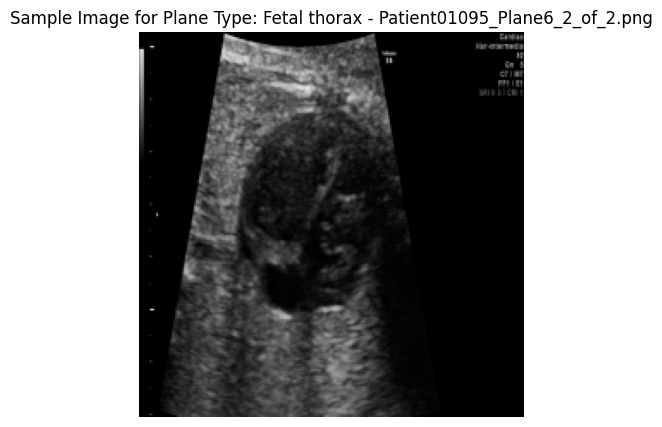

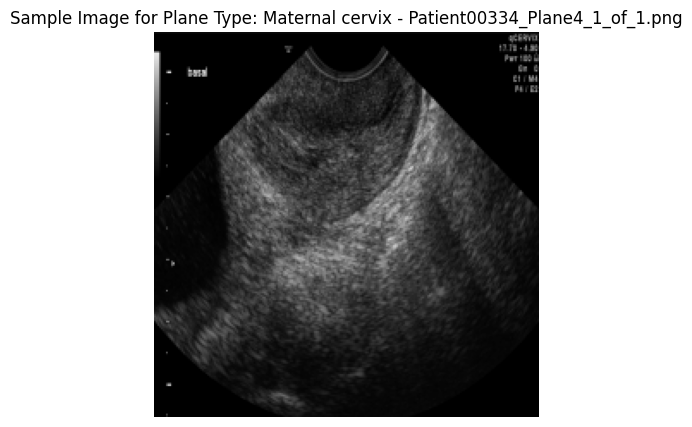

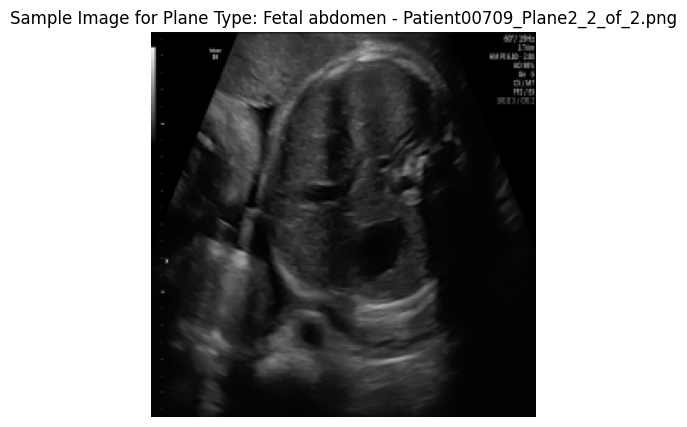

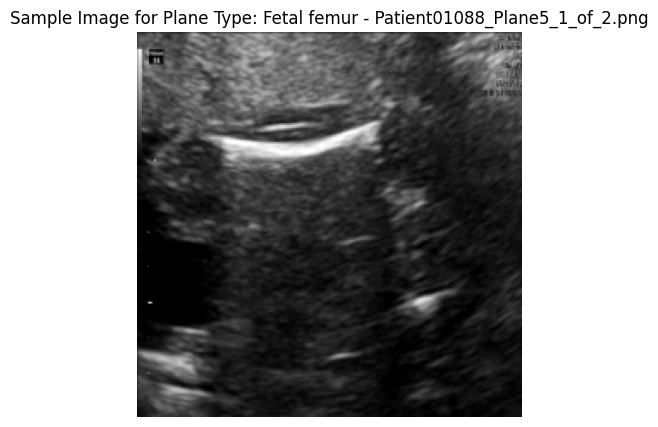

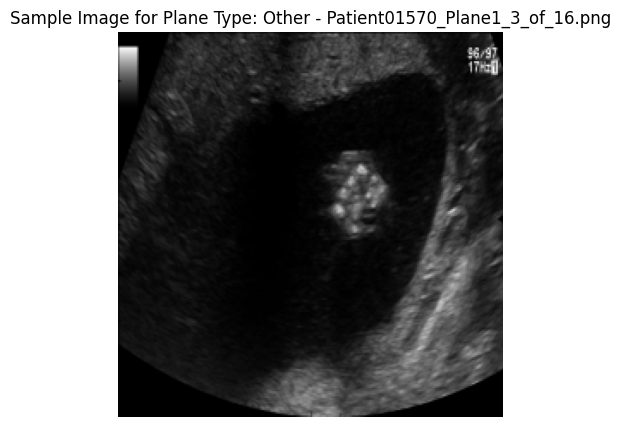

In [ ]:
# prompt: give sample one images on resized images in each class with nme

# Define the directory containing the resized images
resized_images_dir = '/content/unzipped_files/Resized_Planes'

# Get the list of plane types
plane_types = os.listdir(resized_images_dir)

# Display sample images for each plane type
for plane_type in plane_types:
    plane_dir = os.path.join(resized_images_dir, plane_type)
    image_files = os.listdir(plane_dir)

    # Select the first image as a sample
    sample_image = image_files[0]

    image_path = os.path.join(plane_dir, sample_image)
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Sample Image for Plane Type: {plane_type} - {sample_image}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image {sample_image}: {e}")


# 8.Normalize the images

In [ ]:
import cv2
import numpy as np
import os

# Define paths
resized_images_dir = '/content/unzipped_files/Resized_Planes'
normalized_images_dir = '/content/unzipped_files/Normalized_Planes'

# Target size
target_size = (224, 224)  # (width, height)

# Create the normalized images directory if it doesn't exist
os.makedirs(normalized_images_dir, exist_ok=True)

# Normalize and save images
for plane_type in os.listdir(resized_images_dir):
    plane_dir = os.path.join(resized_images_dir, plane_type)
    normalized_plane_dir = os.path.join(normalized_images_dir, plane_type)

    # Create directory for each plane type in normalized folder
    os.makedirs(normalized_plane_dir, exist_ok=True)

    if os.path.isdir(plane_dir):
        for image_name in os.listdir(plane_dir):
            src_path = os.path.join(plane_dir, image_name)
            dst_path = os.path.join(normalized_plane_dir, image_name)

            # Read the image
            img = cv2.imread(src_path)

            if img is not None:
                # Convert to float32 for normalization
                img_float = img.astype(np.float32)

                # Normalize the image
                img_normalized = img_float / 255.0

                # Convert back to uint8
                img_normalized_uint8 = (img_normalized * 255).astype(np.uint8)

                # Save the normalized image
                cv2.imwrite(dst_path, img_normalized_uint8)
                print(f"Normalized and saved: {dst_path}")
            else:
                print(f"Failed to read image: {src_path}")

print("\nNormalization completed.")


Streaming output truncated to the last 5000 lines.
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01202_Plane5_1_of_2.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01439_Plane5_1_of_1.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01691_Plane5_1_of_1.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01636_Plane5_1_of_1.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01657_Plane5_1_of_1.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01157_Plane5_1_of_1.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01648_Plane5_5_of_5.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01088_Plane5_2_of_2.png
Normalized and saved: /content/unzipped_files/Normalized_Planes/Fetal femur/Patient01133_Plan

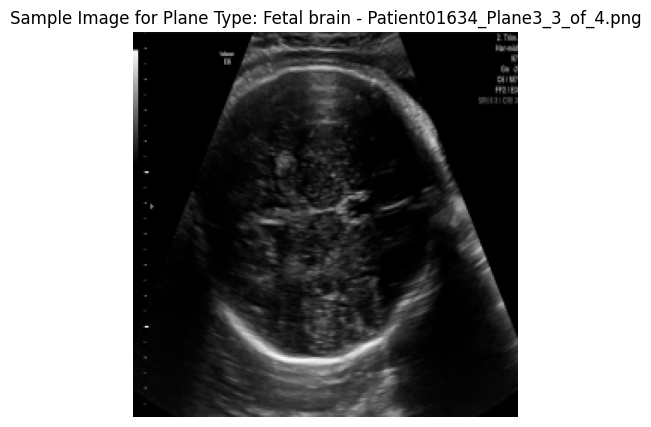

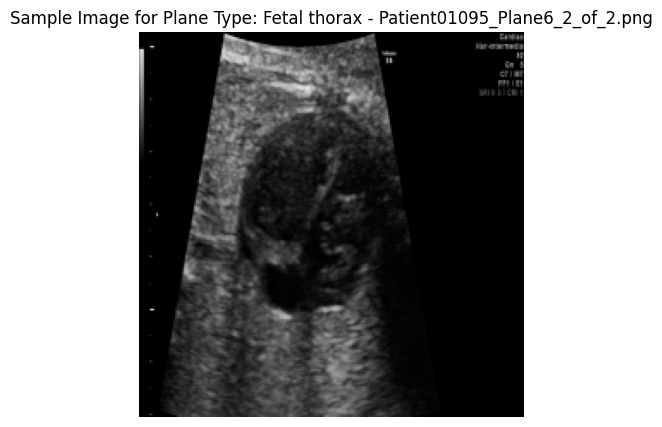

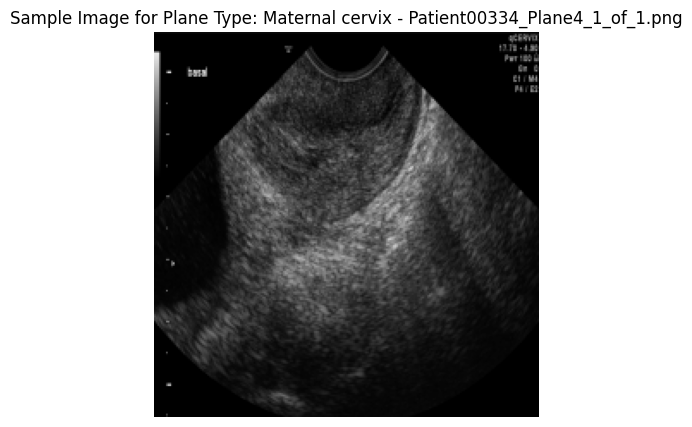

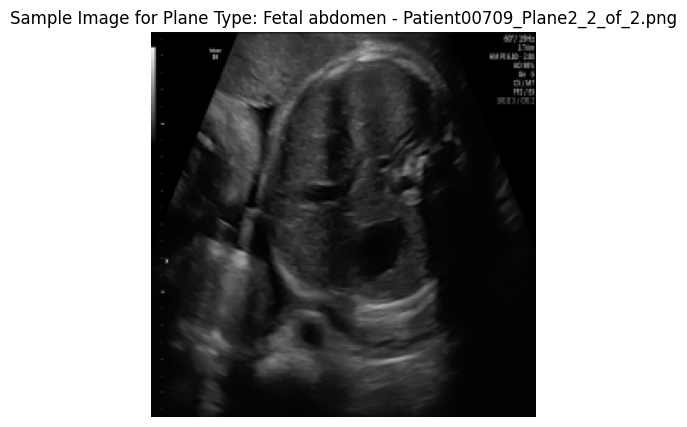

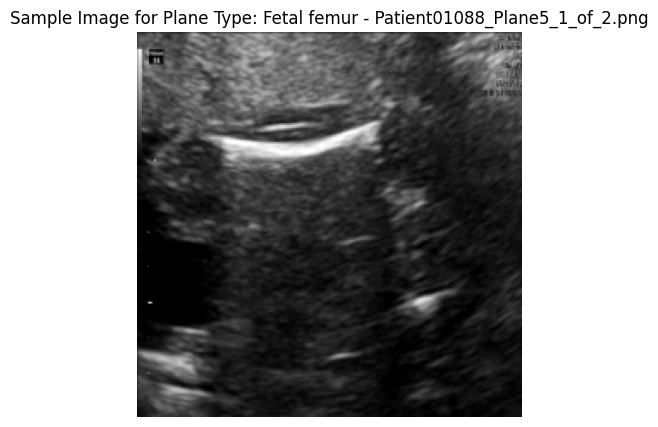

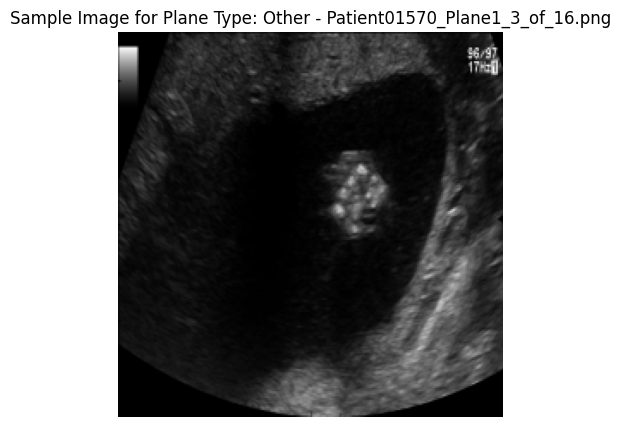

In [ ]:
# prompt: give sample one images on normalized images in each class with name

# Define the directory containing the normalized images
normalized_images_dir = '/content/unzipped_files/Normalized_Planes'

# Get the list of plane types
plane_types = os.listdir(normalized_images_dir)

# Display sample images for each plane type
for plane_type in plane_types:
    plane_dir = os.path.join(normalized_images_dir, plane_type)
    image_files = os.listdir(plane_dir)

    # Select the first image as a sample
    sample_image = image_files[0]

    image_path = os.path.join(plane_dir, sample_image)
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Sample Image for Plane Type: {plane_type} - {sample_image}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image {sample_image}: {e}")


# 9.Feature extraction on images

In [ ]:
import os
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from sklearn.model_selection import train_test_split

# Define paths
normalized_images_dir = '/content/unzipped_files/Normalized_Planes'
features_dir = '/content/unzipped_files/Extracted_Features'
train_features_dir = '/content/unzipped_files/Train_Features'
val_features_dir = '/content/unzipped_files/Val_Features'

# Create directories for features, training, and validation if they don't exist
os.makedirs(features_dir, exist_ok=True)
os.makedirs(train_features_dir, exist_ok=True)
os.makedirs(val_features_dir, exist_ok=True)

# Define image transformation pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained ResNet-50 model with updated weights parameter
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.eval()  # Set model to evaluation mode

# Define a function to extract features from an image
def extract_features(image):
    with torch.no_grad():
        # Transform image to tensor and add batch dimension
        input_tensor = preprocess(image).unsqueeze(0)
        # Perform forward pass
        features = model(input_tensor)
        return features.squeeze().numpy()

# Function to save features to a directory
def save_features(features, file_names, base_dir):
    for features_arr, file_name in zip(features, file_names):
        plane_type = os.path.dirname(file_name)
        os.makedirs(os.path.join(base_dir, plane_type), exist_ok=True)
        feature_file_path = os.path.join(base_dir, file_name + '.npy')
        np.save(feature_file_path, features_arr)

# Perform feature extraction and save features
for plane_type in os.listdir(normalized_images_dir):
    plane_dir = os.path.join(normalized_images_dir, plane_type)
    feature_plane_dir = os.path.join(features_dir, plane_type)

    # Create directory for each plane type in features folder
    os.makedirs(feature_plane_dir, exist_ok=True)

    if os.path.isdir(plane_dir):
        for image_name in os.listdir(plane_dir):
            src_path = os.path.join(plane_dir, image_name)
            img = Image.open(src_path).convert('RGB')  # Open image and convert to RGB

            # Extract features
            features = extract_features(img)

            # Save the features
            dst_path = os.path.join(feature_plane_dir, image_name)
            np.save(dst_path, features)
            print(f"Extracted and saved features: {dst_path}")

print("\nFeature extraction completed.")

# Load features from all plane types
all_features = []
all_file_names = []

def load_features_from_dir(dir_path):
    feature_list = []
    file_names = []
    print(f"Loading features from: {dir_path}")
    for file_name in os.listdir(dir_path):
        if file_name.endswith('.npy'):
            feature_path = os.path.join(dir_path, file_name)
            try:
                features = np.load(feature_path)
                feature_list.append(features)
                file_names.append(file_name)
                print(f"Loaded features from: {feature_path}")
            except Exception as e:
                print(f"Error loading {feature_path}: {e}")
    return np.array(feature_list), file_names

for plane_type in os.listdir(features_dir):
    plane_dir = os.path.join(features_dir, plane_type)
    if os.path.isdir(plane_dir):
        features, file_names = load_features_from_dir(plane_dir)
        all_features.extend(features)
        all_file_names.extend([os.path.join(plane_type, fname) for fname in file_names])

# Convert to numpy arrays
all_features = np.array(all_features)

# Debugging: Check lengths
print(f"Number of features: {len(all_features)}")
print(f"Number of file names: {len(all_file_names)}")

# Ensure lengths match
if len(all_features) != len(all_file_names):
    raise ValueError("Mismatch between number of features and file names")

# Split data into training and validation sets
if len(all_features) > 0:
    X_train, X_val, y_train, y_val = train_test_split(all_features, all_file_names, test_size=0.2, random_state=42)

    # Save the split features
    def save_features(features, file_names, base_dir):
        for features_arr, file_name in zip(features, file_names):
            plane_type = os.path.dirname(file_name)
            os.makedirs(os.path.join(base_dir, plane_type), exist_ok=True)
            feature_file_path = os.path.join(base_dir, file_name + '.npy')
            np.save(feature_file_path, features_arr)

    # Save training features
    save_features(X_train, y_train, train_features_dir)

    # Save validation features
    save_features(X_val, y_val, val_features_dir)

    print("\nFeature splitting and saving completed.")
else:
    print("No features to split.")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


Streaming output truncated to the last 5000 lines.
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient01478_Plane5_1_of_1.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient00956_Plane5_1_of_1.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient01368_Plane5_1_of_1.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient01046_Plane5_1_of_3.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient01132_Plane5_2_of_2.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient00870_Plane5_1_of_1.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient01324_Plane5_3_of_3.png.npy
Loaded features from: /content/unzipped_files/Extracted_Features/Fetal femur/Patient00976_Plane5_1_of_1.png.npy
Loaded features from: /content/unzipped_files/Extract

# 10.Loads the Splitting Data

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define paths
train_features_dir = '/content/unzipped_files/Train_Features'
val_features_dir = '/content/unzipped_files/Val_Features'

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return feature, label

# Load features and labels
def load_features_and_labels(features_dir):
    features_list = []
    labels_list = []
    for label in os.listdir(features_dir):
        label_dir = os.path.join(features_dir, label)
        for file_name in os.listdir(label_dir):
            if file_name.endswith('.npy'):
                feature_path = os.path.join(label_dir, file_name)
                features = np.load(feature_path)
                features_list.append(features)
                labels_list.append(label)
    return np.array(features_list), np.array(labels_list)

# Load training and validation data
train_features, train_labels = load_features_and_labels(train_features_dir)
val_features, val_labels = load_features_and_labels(val_features_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

# Create datasets and data loaders
train_dataset = CustomDataset(train_features, train_labels_encoded)
val_dataset = CustomDataset(val_features, val_labels_encoded)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# 12.MLP model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLPModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define the model
input_size = train_features.shape[1]  # Number of features
num_classes = len(label_encoder.classes_)
model = MLPModel(input_size=input_size, num_classes=num_classes)


# 13.Train the model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

def train_model(model, train_loader, val_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update running loss
            running_loss += loss.item() * inputs.size(0)

            # Compute training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Calculate average loss and training accuracy
        epoch_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

        # Validate the model
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = 100 * correct_val / total_val
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Train the model
train_model(model, train_loader, val_loader)


Epoch 1/10, Loss: 0.6246, Training Accuracy: 76.58%
Validation Accuracy: 86.17%
Epoch 2/10, Loss: 0.4204, Training Accuracy: 84.66%
Validation Accuracy: 88.19%
Epoch 3/10, Loss: 0.3774, Training Accuracy: 85.92%
Validation Accuracy: 89.23%
Epoch 4/10, Loss: 0.3449, Training Accuracy: 87.19%
Validation Accuracy: 89.56%
Epoch 5/10, Loss: 0.3281, Training Accuracy: 88.10%
Validation Accuracy: 89.80%
Epoch 6/10, Loss: 0.3211, Training Accuracy: 88.53%
Validation Accuracy: 88.67%
Epoch 7/10, Loss: 0.3049, Training Accuracy: 88.90%
Validation Accuracy: 89.15%
Epoch 8/10, Loss: 0.2899, Training Accuracy: 89.52%
Validation Accuracy: 89.76%
Epoch 9/10, Loss: 0.2767, Training Accuracy: 89.90%
Validation Accuracy: 89.56%
Epoch 10/10, Loss: 0.2745, Training Accuracy: 90.13%
Validation Accuracy: 91.17%


In [ ]:
#perform model accuracy with percentages

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate on training set
train_accuracy = evaluate_model(model, train_loader)
print(f"Training Accuracy: {train_accuracy:.2f}%")
# Evaluate on validation set
val_accuracy = evaluate_model(model, val_loader)
print(f"Validation Accuracy: {val_accuracy:.2f}%")

Training Accuracy: 93.24%
Validation Accuracy: 91.17%


# 14.Metrics and confusion matrix

Epoch 1/20, Training Accuracy: 78.22%
Validation Accuracy: 84.60%
Epoch 2/20, Training Accuracy: 84.32%
Validation Accuracy: 87.74%
Epoch 3/20, Training Accuracy: 85.69%
Validation Accuracy: 86.33%
Epoch 4/20, Training Accuracy: 87.25%
Validation Accuracy: 85.89%
Epoch 5/20, Training Accuracy: 87.74%
Validation Accuracy: 85.85%
Epoch 6/20, Training Accuracy: 88.18%
Validation Accuracy: 89.68%
Epoch 7/20, Training Accuracy: 89.09%
Validation Accuracy: 88.71%
Epoch 8/20, Training Accuracy: 90.37%
Validation Accuracy: 90.20%
Epoch 9/20, Training Accuracy: 91.05%
Validation Accuracy: 90.20%
Epoch 10/20, Training Accuracy: 91.23%
Validation Accuracy: 90.48%
Epoch 11/20, Training Accuracy: 91.81%
Validation Accuracy: 90.48%
Epoch 12/20, Training Accuracy: 91.81%
Validation Accuracy: 90.28%
Epoch 13/20, Training Accuracy: 92.05%
Validation Accuracy: 90.48%
Epoch 14/20, Training Accuracy: 92.51%
Validation Accuracy: 90.32%
Epoch 15/20, Training Accuracy: 92.89%
Validation Accuracy: 90.40%
Epoc

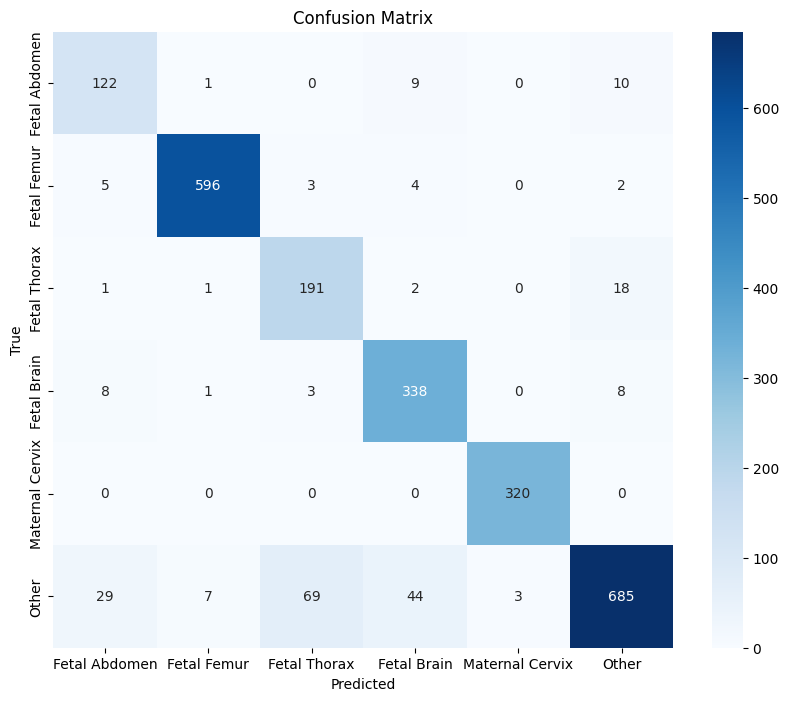

Classification Report:
                  precision    recall  f1-score   support

  Fetal Abdomen       0.74      0.86      0.79       142
    Fetal Femur       0.98      0.98      0.98       610
   Fetal Thorax       0.72      0.90      0.80       213
    Fetal Brain       0.85      0.94      0.90       358
Maternal Cervix       0.99      1.00      1.00       320
          Other       0.95      0.82      0.88       837

       accuracy                           0.91      2480
      macro avg       0.87      0.92      0.89      2480
   weighted avg       0.92      0.91      0.91      2480



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define the MLP model
class ImprovedMLPModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ImprovedMLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        out = F.relu(self.bn1(self.fc1(x)))
        out = self.dropout(out)
        out = F.relu(self.bn2(self.fc2(out)))
        out = self.dropout(out)
        out = self.fc3(out)
        return out

# Instantiate the model
input_size = 1000  # Number of features from ResNet-50
hidden_size1 = 512
hidden_size2 = 256
num_classes = 6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ImprovedMLPModel(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# Load your training data (train_loader) and validation data (val_loader)
# train_loader, val_loader should be pre-defined

# Calculate class weights to handle class imbalance
train_labels = []  # Fill this with actual training labels from your dataset
for _, labels in train_loader:
    train_labels.extend(labels.numpy())

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Define loss function with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Define optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training function
def train_model(model, train_loader, val_loader, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update running loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Adjust learning rate
        scheduler.step()

        # Training stats
        train_accuracy = 100 * correct_train / total_train
        print(f"Epoch {epoch+1}/{num_epochs}, Training Accuracy: {train_accuracy:.2f}%")

        # Validation phase
        model.eval()
        correct_val = 0
        total_val = 0
        val_preds, val_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_accuracy = 100 * correct_val / total_val
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

    return val_preds, val_labels

# Train the model
val_preds, val_labels = train_model(model, train_loader, val_loader)

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_preds)
print("Confusion Matrix:\n", cm)

# Class names
class_names = [
    'Fetal Abdomen', 'Fetal Femur', 'Fetal Thorax',
    'Fetal Brain', 'Maternal Cervix', 'Other'
]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(val_labels, val_preds, target_names=class_names)
print("Classification Report:\n", report)


# 15.Evaluate model

In [ ]:
# Initialize your PyTorch model
model = ImprovedMLPModel(input_size, hidden_size1, hidden_size2, num_classes).to(device)
model.eval()

ImprovedMLPModel(
  (fc1): Linear(in_features=1000, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=6, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

# 16.Lime technique

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ed8df6516711477310fcf50920b467f34379674843b7d612e88e661b1f2b6ed8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from lime import lime_tabular
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the PyTorch model
class ImprovedMLPModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ImprovedMLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        out = F.relu(self.bn1(self.fc1(x)))
        out = self.dropout(out)
        out = F.relu(self.bn2(self.fc2(out)))
        out = self.dropout(out)
        out = self.fc3(out)
        return out

# Initialize and load the model
input_size = 1000  # Example input size
hidden_size1 = 512
hidden_size2 = 256
num_classes = 6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedMLPModel(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# Define the prediction function for LIME
def predict_fn(x):
    with torch.no_grad():
        x = torch.tensor(x, dtype=torch.float32).to(device)
        outputs = model(x)
        probabilities = F.softmax(outputs, dim=1)  # Convert logits to probabilities
        return probabilities.cpu().numpy()

# Prepare your data
# Assuming inputs_np is your numpy array of input data
# and class_names is a list of class names
inputs_np = np.random.rand(100, input_size)  # Replace with your actual data
class_names = ['Fetal Abdomen', 'Fetal Femur', 'Fetal Thorax', 'Fetal Brain', 'Maternal Cervix', 'Other']

# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=inputs_np,
    mode='classification',
    feature_names=[f'feature_{i}' for i in range(inputs_np.shape[1])],
    class_names=class_names,
    discretize_continuous=True
)

# Choose an instance to explain
instance_idx = 0
explanation = explainer.explain_instance(
    data_row=inputs_np[instance_idx],
    predict_fn=predict_fn
)

# Display the explanation
explanation.show_in_notebook(show_table=True)

# If running in a script or a non-notebook environment, use this instead
# explanation.save_to_file('lime_explanation.html')


# 17. Save the model

In [ ]:
# prompt: save the model

# Save the trained model
torch.save(model.state_dict(), '/content/unzipped_files/trained_model.pth')


In [ ]:
# prompt: save the model in drive

from google.colab import drive
drive.mount('/content/drive')
# Assuming 'model' is your trained PyTorch model
model_save_path = '/content/drive/My Drive/trained_model.pth'
torch.save(model.state_dict(), model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
